# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

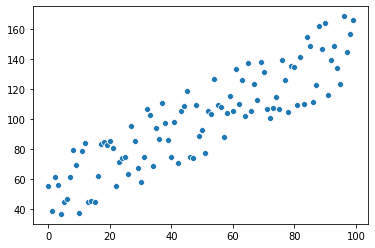

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 472.602386
Iteration 1 | Cost: 439.831988
Iteration 2 | Cost: 425.043788
Iteration 3 | Cost: 418.365803
Iteration 4 | Cost: 415.345635
Iteration 5 | Cost: 413.975192
Iteration 6 | Cost: 413.348797
Iteration 7 | Cost: 413.057979
Iteration 8 | Cost: 412.918511
Iteration 9 | Cost: 412.847304
Iteration 10 | Cost: 412.806884
Iteration 11 | Cost: 412.780350
Iteration 12 | Cost: 412.760079
Iteration 13 | Cost: 412.742633
Iteration 14 | Cost: 412.726462
Iteration 15 | Cost: 412.710866
Iteration 16 | Cost: 412.695530
Iteration 17 | Cost: 412.680311
Iteration 18 | Cost: 412.665147
Iteration 19 | Cost: 412.650006
Iteration 20 | Cost: 412.634877
Iteration 21 | Cost: 412.619754
Iteration 22 | Cost: 412.604634
Iteration 23 | Cost: 412.589515
Iteration 24 | Cost: 412.574398
Iteration 25 | Cost: 412.559281
Iteration 26 | Cost: 412.544166
Iteration 27 | Cost: 412.529051
Iteration 28 | Cost: 412.513937
Iteration 29 | Cost: 412.498824
Iteration 30 | Cost: 412.483712
Iteration 31 | Cos

Iteration 922 | Cost: 399.304328
Iteration 923 | Cost: 399.289885
Iteration 924 | Cost: 399.275443
Iteration 925 | Cost: 399.261002
Iteration 926 | Cost: 399.246561
Iteration 927 | Cost: 399.232121
Iteration 928 | Cost: 399.217682
Iteration 929 | Cost: 399.203243
Iteration 930 | Cost: 399.188806
Iteration 931 | Cost: 399.174369
Iteration 932 | Cost: 399.159932
Iteration 933 | Cost: 399.145497
Iteration 934 | Cost: 399.131062
Iteration 935 | Cost: 399.116628
Iteration 936 | Cost: 399.102195
Iteration 937 | Cost: 399.087762
Iteration 938 | Cost: 399.073330
Iteration 939 | Cost: 399.058899
Iteration 940 | Cost: 399.044468
Iteration 941 | Cost: 399.030039
Iteration 942 | Cost: 399.015610
Iteration 943 | Cost: 399.001182
Iteration 944 | Cost: 398.986754
Iteration 945 | Cost: 398.972327
Iteration 946 | Cost: 398.957901
Iteration 947 | Cost: 398.943476
Iteration 948 | Cost: 398.929052
Iteration 949 | Cost: 398.914628
Iteration 950 | Cost: 398.900205
Iteration 951 | Cost: 398.885782
Iteration 

Iteration 1712 | Cost: 388.119845
Iteration 1713 | Cost: 388.105969
Iteration 1714 | Cost: 388.092095
Iteration 1715 | Cost: 388.078221
Iteration 1716 | Cost: 388.064347
Iteration 1717 | Cost: 388.050475
Iteration 1718 | Cost: 388.036603
Iteration 1719 | Cost: 388.022732
Iteration 1720 | Cost: 388.008861
Iteration 1721 | Cost: 387.994992
Iteration 1722 | Cost: 387.981123
Iteration 1723 | Cost: 387.967254
Iteration 1724 | Cost: 387.953387
Iteration 1725 | Cost: 387.939520
Iteration 1726 | Cost: 387.925654
Iteration 1727 | Cost: 387.911788
Iteration 1728 | Cost: 387.897923
Iteration 1729 | Cost: 387.884059
Iteration 1730 | Cost: 387.870196
Iteration 1731 | Cost: 387.856333
Iteration 1732 | Cost: 387.842471
Iteration 1733 | Cost: 387.828610
Iteration 1734 | Cost: 387.814749
Iteration 1735 | Cost: 387.800890
Iteration 1736 | Cost: 387.787030
Iteration 1737 | Cost: 387.773172
Iteration 1738 | Cost: 387.759314
Iteration 1739 | Cost: 387.745457
Iteration 1740 | Cost: 387.731601
Iteration 1741

Iteration 2229 | Cost: 381.039387
Iteration 2230 | Cost: 381.025870
Iteration 2231 | Cost: 381.012355
Iteration 2232 | Cost: 380.998840
Iteration 2233 | Cost: 380.985326
Iteration 2234 | Cost: 380.971813
Iteration 2235 | Cost: 380.958300
Iteration 2236 | Cost: 380.944788
Iteration 2237 | Cost: 380.931277
Iteration 2238 | Cost: 380.917767
Iteration 2239 | Cost: 380.904257
Iteration 2240 | Cost: 380.890747
Iteration 2241 | Cost: 380.877239
Iteration 2242 | Cost: 380.863731
Iteration 2243 | Cost: 380.850224
Iteration 2244 | Cost: 380.836717
Iteration 2245 | Cost: 380.823212
Iteration 2246 | Cost: 380.809706
Iteration 2247 | Cost: 380.796202
Iteration 2248 | Cost: 380.782698
Iteration 2249 | Cost: 380.769195
Iteration 2250 | Cost: 380.755693
Iteration 2251 | Cost: 380.742191
Iteration 2252 | Cost: 380.728690
Iteration 2253 | Cost: 380.715190
Iteration 2254 | Cost: 380.701690
Iteration 2255 | Cost: 380.688191
Iteration 2256 | Cost: 380.674693
Iteration 2257 | Cost: 380.661195
Iteration 2258

Iteration 2751 | Cost: 374.076439
Iteration 2752 | Cost: 374.063276
Iteration 2753 | Cost: 374.050114
Iteration 2754 | Cost: 374.036952
Iteration 2755 | Cost: 374.023792
Iteration 2756 | Cost: 374.010631
Iteration 2757 | Cost: 373.997472
Iteration 2758 | Cost: 373.984313
Iteration 2759 | Cost: 373.971155
Iteration 2760 | Cost: 373.957998
Iteration 2761 | Cost: 373.944841
Iteration 2762 | Cost: 373.931685
Iteration 2763 | Cost: 373.918529
Iteration 2764 | Cost: 373.905375
Iteration 2765 | Cost: 373.892221
Iteration 2766 | Cost: 373.879067
Iteration 2767 | Cost: 373.865914
Iteration 2768 | Cost: 373.852762
Iteration 2769 | Cost: 373.839611
Iteration 2770 | Cost: 373.826460
Iteration 2771 | Cost: 373.813310
Iteration 2772 | Cost: 373.800161
Iteration 2773 | Cost: 373.787012
Iteration 2774 | Cost: 373.773864
Iteration 2775 | Cost: 373.760716
Iteration 2776 | Cost: 373.747570
Iteration 2777 | Cost: 373.734424
Iteration 2778 | Cost: 373.721278
Iteration 2779 | Cost: 373.708133
Iteration 2780

Iteration 3273 | Cost: 367.295503
Iteration 3274 | Cost: 367.282684
Iteration 3275 | Cost: 367.269866
Iteration 3276 | Cost: 367.257048
Iteration 3277 | Cost: 367.244232
Iteration 3278 | Cost: 367.231416
Iteration 3279 | Cost: 367.218600
Iteration 3280 | Cost: 367.205785
Iteration 3281 | Cost: 367.192971
Iteration 3282 | Cost: 367.180158
Iteration 3283 | Cost: 367.167345
Iteration 3284 | Cost: 367.154533
Iteration 3285 | Cost: 367.141721
Iteration 3286 | Cost: 367.128910
Iteration 3287 | Cost: 367.116100
Iteration 3288 | Cost: 367.103290
Iteration 3289 | Cost: 367.090482
Iteration 3290 | Cost: 367.077673
Iteration 3291 | Cost: 367.064866
Iteration 3292 | Cost: 367.052059
Iteration 3293 | Cost: 367.039252
Iteration 3294 | Cost: 367.026447
Iteration 3295 | Cost: 367.013642
Iteration 3296 | Cost: 367.000837
Iteration 3297 | Cost: 366.988033
Iteration 3298 | Cost: 366.975230
Iteration 3299 | Cost: 366.962428
Iteration 3300 | Cost: 366.949626
Iteration 3301 | Cost: 366.936825
Iteration 3302

Iteration 3682 | Cost: 362.106556
Iteration 3683 | Cost: 362.094001
Iteration 3684 | Cost: 362.081446
Iteration 3685 | Cost: 362.068892
Iteration 3686 | Cost: 362.056339
Iteration 3687 | Cost: 362.043786
Iteration 3688 | Cost: 362.031234
Iteration 3689 | Cost: 362.018682
Iteration 3690 | Cost: 362.006131
Iteration 3691 | Cost: 361.993581
Iteration 3692 | Cost: 361.981031
Iteration 3693 | Cost: 361.968482
Iteration 3694 | Cost: 361.955934
Iteration 3695 | Cost: 361.943386
Iteration 3696 | Cost: 361.930839
Iteration 3697 | Cost: 361.918292
Iteration 3698 | Cost: 361.905746
Iteration 3699 | Cost: 361.893201
Iteration 3700 | Cost: 361.880657
Iteration 3701 | Cost: 361.868113
Iteration 3702 | Cost: 361.855569
Iteration 3703 | Cost: 361.843027
Iteration 3704 | Cost: 361.830485
Iteration 3705 | Cost: 361.817943
Iteration 3706 | Cost: 361.805403
Iteration 3707 | Cost: 361.792863
Iteration 3708 | Cost: 361.780323
Iteration 3709 | Cost: 361.767784
Iteration 3710 | Cost: 361.755246
Iteration 3711

Iteration 4054 | Cost: 357.479638
Iteration 4055 | Cost: 357.467317
Iteration 4056 | Cost: 357.454997
Iteration 4057 | Cost: 357.442678
Iteration 4058 | Cost: 357.430359
Iteration 4059 | Cost: 357.418041
Iteration 4060 | Cost: 357.405723
Iteration 4061 | Cost: 357.393407
Iteration 4062 | Cost: 357.381090
Iteration 4063 | Cost: 357.368775
Iteration 4064 | Cost: 357.356460
Iteration 4065 | Cost: 357.344145
Iteration 4066 | Cost: 357.331832
Iteration 4067 | Cost: 357.319518
Iteration 4068 | Cost: 357.307206
Iteration 4069 | Cost: 357.294894
Iteration 4070 | Cost: 357.282583
Iteration 4071 | Cost: 357.270272
Iteration 4072 | Cost: 357.257962
Iteration 4073 | Cost: 357.245653
Iteration 4074 | Cost: 357.233344
Iteration 4075 | Cost: 357.221036
Iteration 4076 | Cost: 357.208728
Iteration 4077 | Cost: 357.196422
Iteration 4078 | Cost: 357.184115
Iteration 4079 | Cost: 357.171810
Iteration 4080 | Cost: 357.159505
Iteration 4081 | Cost: 357.147200
Iteration 4082 | Cost: 357.134897
Iteration 4083

Iteration 4295 | Cost: 354.528376
Iteration 4296 | Cost: 354.516205
Iteration 4297 | Cost: 354.504035
Iteration 4298 | Cost: 354.491865
Iteration 4299 | Cost: 354.479696
Iteration 4300 | Cost: 354.467527
Iteration 4301 | Cost: 354.455360
Iteration 4302 | Cost: 354.443193
Iteration 4303 | Cost: 354.431026
Iteration 4304 | Cost: 354.418860
Iteration 4305 | Cost: 354.406695
Iteration 4306 | Cost: 354.394530
Iteration 4307 | Cost: 354.382366
Iteration 4308 | Cost: 354.370203
Iteration 4309 | Cost: 354.358040
Iteration 4310 | Cost: 354.345877
Iteration 4311 | Cost: 354.333716
Iteration 4312 | Cost: 354.321555
Iteration 4313 | Cost: 354.309394
Iteration 4314 | Cost: 354.297235
Iteration 4315 | Cost: 354.285076
Iteration 4316 | Cost: 354.272917
Iteration 4317 | Cost: 354.260759
Iteration 4318 | Cost: 354.248602
Iteration 4319 | Cost: 354.236445
Iteration 4320 | Cost: 354.224289
Iteration 4321 | Cost: 354.212134
Iteration 4322 | Cost: 354.199979
Iteration 4323 | Cost: 354.187825
Iteration 4324

Iteration 4667 | Cost: 350.043164
Iteration 4668 | Cost: 350.031220
Iteration 4669 | Cost: 350.019278
Iteration 4670 | Cost: 350.007336
Iteration 4671 | Cost: 349.995394
Iteration 4672 | Cost: 349.983453
Iteration 4673 | Cost: 349.971513
Iteration 4674 | Cost: 349.959573
Iteration 4675 | Cost: 349.947634
Iteration 4676 | Cost: 349.935696
Iteration 4677 | Cost: 349.923758
Iteration 4678 | Cost: 349.911821
Iteration 4679 | Cost: 349.899884
Iteration 4680 | Cost: 349.887948
Iteration 4681 | Cost: 349.876013
Iteration 4682 | Cost: 349.864078
Iteration 4683 | Cost: 349.852144
Iteration 4684 | Cost: 349.840210
Iteration 4685 | Cost: 349.828277
Iteration 4686 | Cost: 349.816345
Iteration 4687 | Cost: 349.804413
Iteration 4688 | Cost: 349.792482
Iteration 4689 | Cost: 349.780551
Iteration 4690 | Cost: 349.768622
Iteration 4691 | Cost: 349.756692
Iteration 4692 | Cost: 349.744763
Iteration 4693 | Cost: 349.732835
Iteration 4694 | Cost: 349.720908
Iteration 4695 | Cost: 349.708981
Iteration 4696

Iteration 5377 | Cost: 341.714157
Iteration 5378 | Cost: 341.702636
Iteration 5379 | Cost: 341.691116
Iteration 5380 | Cost: 341.679597
Iteration 5381 | Cost: 341.668078
Iteration 5382 | Cost: 341.656560
Iteration 5383 | Cost: 341.645042
Iteration 5384 | Cost: 341.633525
Iteration 5385 | Cost: 341.622008
Iteration 5386 | Cost: 341.610492
Iteration 5387 | Cost: 341.598977
Iteration 5388 | Cost: 341.587462
Iteration 5389 | Cost: 341.575948
Iteration 5390 | Cost: 341.564434
Iteration 5391 | Cost: 341.552921
Iteration 5392 | Cost: 341.541409
Iteration 5393 | Cost: 341.529897
Iteration 5394 | Cost: 341.518385
Iteration 5395 | Cost: 341.506875
Iteration 5396 | Cost: 341.495365
Iteration 5397 | Cost: 341.483855
Iteration 5398 | Cost: 341.472346
Iteration 5399 | Cost: 341.460838
Iteration 5400 | Cost: 341.449330
Iteration 5401 | Cost: 341.437823
Iteration 5402 | Cost: 341.426316
Iteration 5403 | Cost: 341.414810
Iteration 5404 | Cost: 341.403305
Iteration 5405 | Cost: 341.391800
Iteration 5406

Iteration 5650 | Cost: 338.590624
Iteration 5651 | Cost: 338.579262
Iteration 5652 | Cost: 338.567900
Iteration 5653 | Cost: 338.556539
Iteration 5654 | Cost: 338.545179
Iteration 5655 | Cost: 338.533819
Iteration 5656 | Cost: 338.522460
Iteration 5657 | Cost: 338.511101
Iteration 5658 | Cost: 338.499743
Iteration 5659 | Cost: 338.488385
Iteration 5660 | Cost: 338.477028
Iteration 5661 | Cost: 338.465672
Iteration 5662 | Cost: 338.454316
Iteration 5663 | Cost: 338.442961
Iteration 5664 | Cost: 338.431606
Iteration 5665 | Cost: 338.420252
Iteration 5666 | Cost: 338.408898
Iteration 5667 | Cost: 338.397545
Iteration 5668 | Cost: 338.386193
Iteration 5669 | Cost: 338.374841
Iteration 5670 | Cost: 338.363490
Iteration 5671 | Cost: 338.352139
Iteration 5672 | Cost: 338.340789
Iteration 5673 | Cost: 338.329440
Iteration 5674 | Cost: 338.318091
Iteration 5675 | Cost: 338.306743
Iteration 5676 | Cost: 338.295395
Iteration 5677 | Cost: 338.284048
Iteration 5678 | Cost: 338.272701
Iteration 5679

Iteration 6086 | Cost: 333.690996
Iteration 6087 | Cost: 333.679882
Iteration 6088 | Cost: 333.668769
Iteration 6089 | Cost: 333.657657
Iteration 6090 | Cost: 333.646545
Iteration 6091 | Cost: 333.635434
Iteration 6092 | Cost: 333.624323
Iteration 6093 | Cost: 333.613213
Iteration 6094 | Cost: 333.602103
Iteration 6095 | Cost: 333.590994
Iteration 6096 | Cost: 333.579886
Iteration 6097 | Cost: 333.568778
Iteration 6098 | Cost: 333.557670
Iteration 6099 | Cost: 333.546564
Iteration 6100 | Cost: 333.535457
Iteration 6101 | Cost: 333.524352
Iteration 6102 | Cost: 333.513247
Iteration 6103 | Cost: 333.502142
Iteration 6104 | Cost: 333.491038
Iteration 6105 | Cost: 333.479935
Iteration 6106 | Cost: 333.468832
Iteration 6107 | Cost: 333.457730
Iteration 6108 | Cost: 333.446628
Iteration 6109 | Cost: 333.435527
Iteration 6110 | Cost: 333.424426
Iteration 6111 | Cost: 333.413326
Iteration 6112 | Cost: 333.402227
Iteration 6113 | Cost: 333.391128
Iteration 6114 | Cost: 333.380030
Iteration 6115

Iteration 6421 | Cost: 329.999330
Iteration 6422 | Cost: 329.988403
Iteration 6423 | Cost: 329.977478
Iteration 6424 | Cost: 329.966553
Iteration 6425 | Cost: 329.955628
Iteration 6426 | Cost: 329.944704
Iteration 6427 | Cost: 329.933781
Iteration 6428 | Cost: 329.922858
Iteration 6429 | Cost: 329.911935
Iteration 6430 | Cost: 329.901014
Iteration 6431 | Cost: 329.890092
Iteration 6432 | Cost: 329.879172
Iteration 6433 | Cost: 329.868252
Iteration 6434 | Cost: 329.857332
Iteration 6435 | Cost: 329.846413
Iteration 6436 | Cost: 329.835494
Iteration 6437 | Cost: 329.824577
Iteration 6438 | Cost: 329.813659
Iteration 6439 | Cost: 329.802742
Iteration 6440 | Cost: 329.791826
Iteration 6441 | Cost: 329.780910
Iteration 6442 | Cost: 329.769995
Iteration 6443 | Cost: 329.759081
Iteration 6444 | Cost: 329.748167
Iteration 6445 | Cost: 329.737253
Iteration 6446 | Cost: 329.726340
Iteration 6447 | Cost: 329.715428
Iteration 6448 | Cost: 329.704516
Iteration 6449 | Cost: 329.693605
Iteration 6450

Iteration 6663 | Cost: 327.371285
Iteration 6664 | Cost: 327.360492
Iteration 6665 | Cost: 327.349700
Iteration 6666 | Cost: 327.338908
Iteration 6667 | Cost: 327.328117
Iteration 6668 | Cost: 327.317326
Iteration 6669 | Cost: 327.306536
Iteration 6670 | Cost: 327.295747
Iteration 6671 | Cost: 327.284958
Iteration 6672 | Cost: 327.274169
Iteration 6673 | Cost: 327.263381
Iteration 6674 | Cost: 327.252594
Iteration 6675 | Cost: 327.241807
Iteration 6676 | Cost: 327.231021
Iteration 6677 | Cost: 327.220235
Iteration 6678 | Cost: 327.209450
Iteration 6679 | Cost: 327.198665
Iteration 6680 | Cost: 327.187881
Iteration 6681 | Cost: 327.177097
Iteration 6682 | Cost: 327.166314
Iteration 6683 | Cost: 327.155532
Iteration 6684 | Cost: 327.144750
Iteration 6685 | Cost: 327.133969
Iteration 6686 | Cost: 327.123188
Iteration 6687 | Cost: 327.112407
Iteration 6688 | Cost: 327.101628
Iteration 6689 | Cost: 327.090849
Iteration 6690 | Cost: 327.080070
Iteration 6691 | Cost: 327.069292
Iteration 6692

Iteration 6926 | Cost: 324.551545
Iteration 6927 | Cost: 324.540895
Iteration 6928 | Cost: 324.530246
Iteration 6929 | Cost: 324.519597
Iteration 6930 | Cost: 324.508949
Iteration 6931 | Cost: 324.498301
Iteration 6932 | Cost: 324.487654
Iteration 6933 | Cost: 324.477008
Iteration 6934 | Cost: 324.466362
Iteration 6935 | Cost: 324.455716
Iteration 6936 | Cost: 324.445071
Iteration 6937 | Cost: 324.434427
Iteration 6938 | Cost: 324.423783
Iteration 6939 | Cost: 324.413140
Iteration 6940 | Cost: 324.402497
Iteration 6941 | Cost: 324.391855
Iteration 6942 | Cost: 324.381213
Iteration 6943 | Cost: 324.370572
Iteration 6944 | Cost: 324.359931
Iteration 6945 | Cost: 324.349291
Iteration 6946 | Cost: 324.338652
Iteration 6947 | Cost: 324.328013
Iteration 6948 | Cost: 324.317374
Iteration 6949 | Cost: 324.306736
Iteration 6950 | Cost: 324.296099
Iteration 6951 | Cost: 324.285462
Iteration 6952 | Cost: 324.274826
Iteration 6953 | Cost: 324.264190
Iteration 6954 | Cost: 324.253555
Iteration 6955

Iteration 7235 | Cost: 321.286340
Iteration 7236 | Cost: 321.275856
Iteration 7237 | Cost: 321.265372
Iteration 7238 | Cost: 321.254889
Iteration 7239 | Cost: 321.244407
Iteration 7240 | Cost: 321.233925
Iteration 7241 | Cost: 321.223443
Iteration 7242 | Cost: 321.212963
Iteration 7243 | Cost: 321.202482
Iteration 7244 | Cost: 321.192002
Iteration 7245 | Cost: 321.181523
Iteration 7246 | Cost: 321.171044
Iteration 7247 | Cost: 321.160566
Iteration 7248 | Cost: 321.150088
Iteration 7249 | Cost: 321.139611
Iteration 7250 | Cost: 321.129134
Iteration 7251 | Cost: 321.118658
Iteration 7252 | Cost: 321.108183
Iteration 7253 | Cost: 321.097707
Iteration 7254 | Cost: 321.087233
Iteration 7255 | Cost: 321.076759
Iteration 7256 | Cost: 321.066285
Iteration 7257 | Cost: 321.055813
Iteration 7258 | Cost: 321.045340
Iteration 7259 | Cost: 321.034868
Iteration 7260 | Cost: 321.024397
Iteration 7261 | Cost: 321.013926
Iteration 7262 | Cost: 321.003456
Iteration 7263 | Cost: 320.992986
Iteration 7264

Iteration 7597 | Cost: 317.525641
Iteration 7598 | Cost: 317.515347
Iteration 7599 | Cost: 317.505055
Iteration 7600 | Cost: 317.494762
Iteration 7601 | Cost: 317.484471
Iteration 7602 | Cost: 317.474179
Iteration 7603 | Cost: 317.463889
Iteration 7604 | Cost: 317.453599
Iteration 7605 | Cost: 317.443309
Iteration 7606 | Cost: 317.433020
Iteration 7607 | Cost: 317.422731
Iteration 7608 | Cost: 317.412443
Iteration 7609 | Cost: 317.402156
Iteration 7610 | Cost: 317.391869
Iteration 7611 | Cost: 317.381582
Iteration 7612 | Cost: 317.371296
Iteration 7613 | Cost: 317.361011
Iteration 7614 | Cost: 317.350726
Iteration 7615 | Cost: 317.340441
Iteration 7616 | Cost: 317.330158
Iteration 7617 | Cost: 317.319874
Iteration 7618 | Cost: 317.309591
Iteration 7619 | Cost: 317.299309
Iteration 7620 | Cost: 317.289027
Iteration 7621 | Cost: 317.278746
Iteration 7622 | Cost: 317.268465
Iteration 7623 | Cost: 317.258185
Iteration 7624 | Cost: 317.247905
Iteration 7625 | Cost: 317.237626
Iteration 7626

Iteration 8257 | Cost: 310.844400
Iteration 8258 | Cost: 310.834446
Iteration 8259 | Cost: 310.824492
Iteration 8260 | Cost: 310.814539
Iteration 8261 | Cost: 310.804586
Iteration 8262 | Cost: 310.794634
Iteration 8263 | Cost: 310.784682
Iteration 8264 | Cost: 310.774731
Iteration 8265 | Cost: 310.764780
Iteration 8266 | Cost: 310.754830
Iteration 8267 | Cost: 310.744880
Iteration 8268 | Cost: 310.734931
Iteration 8269 | Cost: 310.724982
Iteration 8270 | Cost: 310.715034
Iteration 8271 | Cost: 310.705087
Iteration 8272 | Cost: 310.695139
Iteration 8273 | Cost: 310.685193
Iteration 8274 | Cost: 310.675246
Iteration 8275 | Cost: 310.665301
Iteration 8276 | Cost: 310.655356
Iteration 8277 | Cost: 310.645411
Iteration 8278 | Cost: 310.635467
Iteration 8279 | Cost: 310.625523
Iteration 8280 | Cost: 310.615580
Iteration 8281 | Cost: 310.605637
Iteration 8282 | Cost: 310.595695
Iteration 8283 | Cost: 310.585753
Iteration 8284 | Cost: 310.575812
Iteration 8285 | Cost: 310.565872
Iteration 8286

Iteration 8890 | Cost: 304.643310
Iteration 8891 | Cost: 304.633670
Iteration 8892 | Cost: 304.624031
Iteration 8893 | Cost: 304.614392
Iteration 8894 | Cost: 304.604754
Iteration 8895 | Cost: 304.595116
Iteration 8896 | Cost: 304.585479
Iteration 8897 | Cost: 304.575842
Iteration 8898 | Cost: 304.566206
Iteration 8899 | Cost: 304.556571
Iteration 8900 | Cost: 304.546935
Iteration 8901 | Cost: 304.537301
Iteration 8902 | Cost: 304.527666
Iteration 8903 | Cost: 304.518033
Iteration 8904 | Cost: 304.508399
Iteration 8905 | Cost: 304.498767
Iteration 8906 | Cost: 304.489134
Iteration 8907 | Cost: 304.479503
Iteration 8908 | Cost: 304.469871
Iteration 8909 | Cost: 304.460240
Iteration 8910 | Cost: 304.450610
Iteration 8911 | Cost: 304.440980
Iteration 8912 | Cost: 304.431351
Iteration 8913 | Cost: 304.421722
Iteration 8914 | Cost: 304.412094
Iteration 8915 | Cost: 304.402466
Iteration 8916 | Cost: 304.392838
Iteration 8917 | Cost: 304.383211
Iteration 8918 | Cost: 304.373585
Iteration 8919

Iteration 9372 | Cost: 300.053256
Iteration 9373 | Cost: 300.043849
Iteration 9374 | Cost: 300.034443
Iteration 9375 | Cost: 300.025037
Iteration 9376 | Cost: 300.015632
Iteration 9377 | Cost: 300.006227
Iteration 9378 | Cost: 299.996823
Iteration 9379 | Cost: 299.987419
Iteration 9380 | Cost: 299.978016
Iteration 9381 | Cost: 299.968613
Iteration 9382 | Cost: 299.959210
Iteration 9383 | Cost: 299.949808
Iteration 9384 | Cost: 299.940407
Iteration 9385 | Cost: 299.931006
Iteration 9386 | Cost: 299.921605
Iteration 9387 | Cost: 299.912205
Iteration 9388 | Cost: 299.902806
Iteration 9389 | Cost: 299.893407
Iteration 9390 | Cost: 299.884008
Iteration 9391 | Cost: 299.874610
Iteration 9392 | Cost: 299.865212
Iteration 9393 | Cost: 299.855815
Iteration 9394 | Cost: 299.846419
Iteration 9395 | Cost: 299.837022
Iteration 9396 | Cost: 299.827627
Iteration 9397 | Cost: 299.818231
Iteration 9398 | Cost: 299.808837
Iteration 9399 | Cost: 299.799442
Iteration 9400 | Cost: 299.790048
Iteration 9401

Iteration 9880 | Cost: 295.335591
Iteration 9881 | Cost: 295.326423
Iteration 9882 | Cost: 295.317256
Iteration 9883 | Cost: 295.308090
Iteration 9884 | Cost: 295.298924
Iteration 9885 | Cost: 295.289759
Iteration 9886 | Cost: 295.280594
Iteration 9887 | Cost: 295.271429
Iteration 9888 | Cost: 295.262265
Iteration 9889 | Cost: 295.253101
Iteration 9890 | Cost: 295.243938
Iteration 9891 | Cost: 295.234775
Iteration 9892 | Cost: 295.225613
Iteration 9893 | Cost: 295.216452
Iteration 9894 | Cost: 295.207290
Iteration 9895 | Cost: 295.198129
Iteration 9896 | Cost: 295.188969
Iteration 9897 | Cost: 295.179809
Iteration 9898 | Cost: 295.170650
Iteration 9899 | Cost: 295.161491
Iteration 9900 | Cost: 295.152332
Iteration 9901 | Cost: 295.143174
Iteration 9902 | Cost: 295.134017
Iteration 9903 | Cost: 295.124860
Iteration 9904 | Cost: 295.115703
Iteration 9905 | Cost: 295.106547
Iteration 9906 | Cost: 295.097391
Iteration 9907 | Cost: 295.088236
Iteration 9908 | Cost: 295.079081
Iteration 9909

Iteration 10359 | Cost: 290.997265
Iteration 10360 | Cost: 290.988317
Iteration 10361 | Cost: 290.979371
Iteration 10362 | Cost: 290.970424
Iteration 10363 | Cost: 290.961479
Iteration 10364 | Cost: 290.952533
Iteration 10365 | Cost: 290.943588
Iteration 10366 | Cost: 290.934644
Iteration 10367 | Cost: 290.925700
Iteration 10368 | Cost: 290.916756
Iteration 10369 | Cost: 290.907813
Iteration 10370 | Cost: 290.898870
Iteration 10371 | Cost: 290.889928
Iteration 10372 | Cost: 290.880987
Iteration 10373 | Cost: 290.872045
Iteration 10374 | Cost: 290.863104
Iteration 10375 | Cost: 290.854164
Iteration 10376 | Cost: 290.845224
Iteration 10377 | Cost: 290.836285
Iteration 10378 | Cost: 290.827346
Iteration 10379 | Cost: 290.818407
Iteration 10380 | Cost: 290.809469
Iteration 10381 | Cost: 290.800531
Iteration 10382 | Cost: 290.791594
Iteration 10383 | Cost: 290.782657
Iteration 10384 | Cost: 290.773721
Iteration 10385 | Cost: 290.764785
Iteration 10386 | Cost: 290.755850
Iteration 10387 | Co

Iteration 10644 | Cost: 288.465599
Iteration 10645 | Cost: 288.456780
Iteration 10646 | Cost: 288.447962
Iteration 10647 | Cost: 288.439144
Iteration 10648 | Cost: 288.430327
Iteration 10649 | Cost: 288.421510
Iteration 10650 | Cost: 288.412693
Iteration 10651 | Cost: 288.403877
Iteration 10652 | Cost: 288.395062
Iteration 10653 | Cost: 288.386247
Iteration 10654 | Cost: 288.377432
Iteration 10655 | Cost: 288.368618
Iteration 10656 | Cost: 288.359804
Iteration 10657 | Cost: 288.350990
Iteration 10658 | Cost: 288.342177
Iteration 10659 | Cost: 288.333365
Iteration 10660 | Cost: 288.324553
Iteration 10661 | Cost: 288.315741
Iteration 10662 | Cost: 288.306930
Iteration 10663 | Cost: 288.298120
Iteration 10664 | Cost: 288.289309
Iteration 10665 | Cost: 288.280500
Iteration 10666 | Cost: 288.271690
Iteration 10667 | Cost: 288.262881
Iteration 10668 | Cost: 288.254073
Iteration 10669 | Cost: 288.245265
Iteration 10670 | Cost: 288.236457
Iteration 10671 | Cost: 288.227650
Iteration 10672 | Co

Iteration 11046 | Cost: 284.956291
Iteration 11047 | Cost: 284.947651
Iteration 11048 | Cost: 284.939010
Iteration 11049 | Cost: 284.930371
Iteration 11050 | Cost: 284.921731
Iteration 11051 | Cost: 284.913092
Iteration 11052 | Cost: 284.904454
Iteration 11053 | Cost: 284.895816
Iteration 11054 | Cost: 284.887178
Iteration 11055 | Cost: 284.878541
Iteration 11056 | Cost: 284.869904
Iteration 11057 | Cost: 284.861268
Iteration 11058 | Cost: 284.852632
Iteration 11059 | Cost: 284.843997
Iteration 11060 | Cost: 284.835362
Iteration 11061 | Cost: 284.826727
Iteration 11062 | Cost: 284.818093
Iteration 11063 | Cost: 284.809460
Iteration 11064 | Cost: 284.800826
Iteration 11065 | Cost: 284.792194
Iteration 11066 | Cost: 284.783561
Iteration 11067 | Cost: 284.774929
Iteration 11068 | Cost: 284.766298
Iteration 11069 | Cost: 284.757667
Iteration 11070 | Cost: 284.749036
Iteration 11071 | Cost: 284.740406
Iteration 11072 | Cost: 284.731776
Iteration 11073 | Cost: 284.723147
Iteration 11074 | Co

Iteration 11983 | Cost: 277.049244
Iteration 11984 | Cost: 277.041004
Iteration 11985 | Cost: 277.032765
Iteration 11986 | Cost: 277.024527
Iteration 11987 | Cost: 277.016288
Iteration 11988 | Cost: 277.008051
Iteration 11989 | Cost: 276.999813
Iteration 11990 | Cost: 276.991576
Iteration 11991 | Cost: 276.983340
Iteration 11992 | Cost: 276.975104
Iteration 11993 | Cost: 276.966868
Iteration 11994 | Cost: 276.958633
Iteration 11995 | Cost: 276.950398
Iteration 11996 | Cost: 276.942163
Iteration 11997 | Cost: 276.933929
Iteration 11998 | Cost: 276.925696
Iteration 11999 | Cost: 276.917463
Iteration 12000 | Cost: 276.909230
Iteration 12001 | Cost: 276.900997
Iteration 12002 | Cost: 276.892766
Iteration 12003 | Cost: 276.884534
Iteration 12004 | Cost: 276.876303
Iteration 12005 | Cost: 276.868072
Iteration 12006 | Cost: 276.859842
Iteration 12007 | Cost: 276.851612
Iteration 12008 | Cost: 276.843383
Iteration 12009 | Cost: 276.835154
Iteration 12010 | Cost: 276.826925
Iteration 12011 | Co

Iteration 12483 | Cost: 272.981237
Iteration 12484 | Cost: 272.973204
Iteration 12485 | Cost: 272.965171
Iteration 12486 | Cost: 272.957139
Iteration 12487 | Cost: 272.949107
Iteration 12488 | Cost: 272.941076
Iteration 12489 | Cost: 272.933045
Iteration 12490 | Cost: 272.925014
Iteration 12491 | Cost: 272.916984
Iteration 12492 | Cost: 272.908954
Iteration 12493 | Cost: 272.900925
Iteration 12494 | Cost: 272.892896
Iteration 12495 | Cost: 272.884867
Iteration 12496 | Cost: 272.876839
Iteration 12497 | Cost: 272.868811
Iteration 12498 | Cost: 272.860784
Iteration 12499 | Cost: 272.852757
Iteration 12500 | Cost: 272.844731
Iteration 12501 | Cost: 272.836705
Iteration 12502 | Cost: 272.828679
Iteration 12503 | Cost: 272.820654
Iteration 12504 | Cost: 272.812629
Iteration 12505 | Cost: 272.804604
Iteration 12506 | Cost: 272.796580
Iteration 12507 | Cost: 272.788556
Iteration 12508 | Cost: 272.780533
Iteration 12509 | Cost: 272.772510
Iteration 12510 | Cost: 272.764488
Iteration 12511 | Co

Iteration 12901 | Cost: 269.658704
Iteration 12902 | Cost: 269.650839
Iteration 12903 | Cost: 269.642975
Iteration 12904 | Cost: 269.635112
Iteration 12905 | Cost: 269.627248
Iteration 12906 | Cost: 269.619386
Iteration 12907 | Cost: 269.611523
Iteration 12908 | Cost: 269.603661
Iteration 12909 | Cost: 269.595799
Iteration 12910 | Cost: 269.587938
Iteration 12911 | Cost: 269.580077
Iteration 12912 | Cost: 269.572217
Iteration 12913 | Cost: 269.564357
Iteration 12914 | Cost: 269.556497
Iteration 12915 | Cost: 269.548638
Iteration 12916 | Cost: 269.540779
Iteration 12917 | Cost: 269.532921
Iteration 12918 | Cost: 269.525063
Iteration 12919 | Cost: 269.517205
Iteration 12920 | Cost: 269.509348
Iteration 12921 | Cost: 269.501491
Iteration 12922 | Cost: 269.493634
Iteration 12923 | Cost: 269.485778
Iteration 12924 | Cost: 269.477923
Iteration 12925 | Cost: 269.470067
Iteration 12926 | Cost: 269.462212
Iteration 12927 | Cost: 269.454358
Iteration 12928 | Cost: 269.446504
Iteration 12929 | Co

Iteration 13420 | Cost: 265.630232
Iteration 13421 | Cost: 265.622572
Iteration 13422 | Cost: 265.614913
Iteration 13423 | Cost: 265.607254
Iteration 13424 | Cost: 265.599595
Iteration 13425 | Cost: 265.591936
Iteration 13426 | Cost: 265.584278
Iteration 13427 | Cost: 265.576620
Iteration 13428 | Cost: 265.568963
Iteration 13429 | Cost: 265.561306
Iteration 13430 | Cost: 265.553650
Iteration 13431 | Cost: 265.545993
Iteration 13432 | Cost: 265.538338
Iteration 13433 | Cost: 265.530682
Iteration 13434 | Cost: 265.523027
Iteration 13435 | Cost: 265.515373
Iteration 13436 | Cost: 265.507719
Iteration 13437 | Cost: 265.500065
Iteration 13438 | Cost: 265.492411
Iteration 13439 | Cost: 265.484758
Iteration 13440 | Cost: 265.477106
Iteration 13441 | Cost: 265.469453
Iteration 13442 | Cost: 265.461801
Iteration 13443 | Cost: 265.454150
Iteration 13444 | Cost: 265.446499
Iteration 13445 | Cost: 265.438848
Iteration 13446 | Cost: 265.431198
Iteration 13447 | Cost: 265.423548
Iteration 13448 | Co

Iteration 13900 | Cost: 261.997740
Iteration 13901 | Cost: 261.990265
Iteration 13902 | Cost: 261.982789
Iteration 13903 | Cost: 261.975314
Iteration 13904 | Cost: 261.967840
Iteration 13905 | Cost: 261.960365
Iteration 13906 | Cost: 261.952892
Iteration 13907 | Cost: 261.945418
Iteration 13908 | Cost: 261.937945
Iteration 13909 | Cost: 261.930472
Iteration 13910 | Cost: 261.923000
Iteration 13911 | Cost: 261.915528
Iteration 13912 | Cost: 261.908057
Iteration 13913 | Cost: 261.900586
Iteration 13914 | Cost: 261.893115
Iteration 13915 | Cost: 261.885644
Iteration 13916 | Cost: 261.878174
Iteration 13917 | Cost: 261.870705
Iteration 13918 | Cost: 261.863235
Iteration 13919 | Cost: 261.855766
Iteration 13920 | Cost: 261.848298
Iteration 13921 | Cost: 261.840830
Iteration 13922 | Cost: 261.833362
Iteration 13923 | Cost: 261.825895
Iteration 13924 | Cost: 261.818428
Iteration 13925 | Cost: 261.810961
Iteration 13926 | Cost: 261.803495
Iteration 13927 | Cost: 261.796029
Iteration 13928 | Co

Iteration 14233 | Cost: 259.529179
Iteration 14234 | Cost: 259.521828
Iteration 14235 | Cost: 259.514478
Iteration 14236 | Cost: 259.507129
Iteration 14237 | Cost: 259.499779
Iteration 14238 | Cost: 259.492430
Iteration 14239 | Cost: 259.485082
Iteration 14240 | Cost: 259.477733
Iteration 14241 | Cost: 259.470386
Iteration 14242 | Cost: 259.463038
Iteration 14243 | Cost: 259.455691
Iteration 14244 | Cost: 259.448344
Iteration 14245 | Cost: 259.440998
Iteration 14246 | Cost: 259.433652
Iteration 14247 | Cost: 259.426306
Iteration 14248 | Cost: 259.418961
Iteration 14249 | Cost: 259.411616
Iteration 14250 | Cost: 259.404272
Iteration 14251 | Cost: 259.396928
Iteration 14252 | Cost: 259.389584
Iteration 14253 | Cost: 259.382241
Iteration 14254 | Cost: 259.374898
Iteration 14255 | Cost: 259.367555
Iteration 14256 | Cost: 259.360213
Iteration 14257 | Cost: 259.352871
Iteration 14258 | Cost: 259.345529
Iteration 14259 | Cost: 259.338188
Iteration 14260 | Cost: 259.330847
Iteration 14261 | Co

Iteration 14685 | Cost: 256.244501
Iteration 14686 | Cost: 256.237317
Iteration 14687 | Cost: 256.230133
Iteration 14688 | Cost: 256.222950
Iteration 14689 | Cost: 256.215768
Iteration 14690 | Cost: 256.208585
Iteration 14691 | Cost: 256.201403
Iteration 14692 | Cost: 256.194222
Iteration 14693 | Cost: 256.187041
Iteration 14694 | Cost: 256.179860
Iteration 14695 | Cost: 256.172679
Iteration 14696 | Cost: 256.165499
Iteration 14697 | Cost: 256.158319
Iteration 14698 | Cost: 256.151140
Iteration 14699 | Cost: 256.143961
Iteration 14700 | Cost: 256.136782
Iteration 14701 | Cost: 256.129604
Iteration 14702 | Cost: 256.122426
Iteration 14703 | Cost: 256.115248
Iteration 14704 | Cost: 256.108071
Iteration 14705 | Cost: 256.100894
Iteration 14706 | Cost: 256.093718
Iteration 14707 | Cost: 256.086541
Iteration 14708 | Cost: 256.079366
Iteration 14709 | Cost: 256.072190
Iteration 14710 | Cost: 256.065015
Iteration 14711 | Cost: 256.057841
Iteration 14712 | Cost: 256.050666
Iteration 14713 | Co

Iteration 15208 | Cost: 252.536702
Iteration 15209 | Cost: 252.529707
Iteration 15210 | Cost: 252.522711
Iteration 15211 | Cost: 252.515716
Iteration 15212 | Cost: 252.508722
Iteration 15213 | Cost: 252.501728
Iteration 15214 | Cost: 252.494734
Iteration 15215 | Cost: 252.487740
Iteration 15216 | Cost: 252.480747
Iteration 15217 | Cost: 252.473754
Iteration 15218 | Cost: 252.466762
Iteration 15219 | Cost: 252.459770
Iteration 15220 | Cost: 252.452778
Iteration 15221 | Cost: 252.445787
Iteration 15222 | Cost: 252.438796
Iteration 15223 | Cost: 252.431805
Iteration 15224 | Cost: 252.424815
Iteration 15225 | Cost: 252.417825
Iteration 15226 | Cost: 252.410835
Iteration 15227 | Cost: 252.403846
Iteration 15228 | Cost: 252.396857
Iteration 15229 | Cost: 252.389868
Iteration 15230 | Cost: 252.382880
Iteration 15231 | Cost: 252.375892
Iteration 15232 | Cost: 252.368905
Iteration 15233 | Cost: 252.361918
Iteration 15234 | Cost: 252.354931
Iteration 15235 | Cost: 252.347944
Iteration 15236 | Co

Iteration 16147 | Cost: 246.121667
Iteration 16148 | Cost: 246.114997
Iteration 16149 | Cost: 246.108327
Iteration 16150 | Cost: 246.101658
Iteration 16151 | Cost: 246.094989
Iteration 16152 | Cost: 246.088320
Iteration 16153 | Cost: 246.081651
Iteration 16154 | Cost: 246.074983
Iteration 16155 | Cost: 246.068316
Iteration 16156 | Cost: 246.061648
Iteration 16157 | Cost: 246.054981
Iteration 16158 | Cost: 246.048314
Iteration 16159 | Cost: 246.041648
Iteration 16160 | Cost: 246.034982
Iteration 16161 | Cost: 246.028316
Iteration 16162 | Cost: 246.021651
Iteration 16163 | Cost: 246.014986
Iteration 16164 | Cost: 246.008321
Iteration 16165 | Cost: 246.001657
Iteration 16166 | Cost: 245.994992
Iteration 16167 | Cost: 245.988329
Iteration 16168 | Cost: 245.981665
Iteration 16169 | Cost: 245.975002
Iteration 16170 | Cost: 245.968340
Iteration 16171 | Cost: 245.961677
Iteration 16172 | Cost: 245.955015
Iteration 16173 | Cost: 245.948354
Iteration 16174 | Cost: 245.941692
Iteration 16175 | Co

Iteration 16803 | Cost: 241.817972
Iteration 16804 | Cost: 241.811521
Iteration 16805 | Cost: 241.805069
Iteration 16806 | Cost: 241.798618
Iteration 16807 | Cost: 241.792167
Iteration 16808 | Cost: 241.785717
Iteration 16809 | Cost: 241.779267
Iteration 16810 | Cost: 241.772817
Iteration 16811 | Cost: 241.766368
Iteration 16812 | Cost: 241.759918
Iteration 16813 | Cost: 241.753470
Iteration 16814 | Cost: 241.747021
Iteration 16815 | Cost: 241.740573
Iteration 16816 | Cost: 241.734125
Iteration 16817 | Cost: 241.727678
Iteration 16818 | Cost: 241.721230
Iteration 16819 | Cost: 241.714784
Iteration 16820 | Cost: 241.708337
Iteration 16821 | Cost: 241.701891
Iteration 16822 | Cost: 241.695445
Iteration 16823 | Cost: 241.688999
Iteration 16824 | Cost: 241.682554
Iteration 16825 | Cost: 241.676109
Iteration 16826 | Cost: 241.669665
Iteration 16827 | Cost: 241.663221
Iteration 16828 | Cost: 241.656777
Iteration 16829 | Cost: 241.650333
Iteration 16830 | Cost: 241.643890
Iteration 16831 | Co

Iteration 17182 | Cost: 239.396056
Iteration 17183 | Cost: 239.389727
Iteration 17184 | Cost: 239.383399
Iteration 17185 | Cost: 239.377070
Iteration 17186 | Cost: 239.370743
Iteration 17187 | Cost: 239.364415
Iteration 17188 | Cost: 239.358088
Iteration 17189 | Cost: 239.351761
Iteration 17190 | Cost: 239.345434
Iteration 17191 | Cost: 239.339108
Iteration 17192 | Cost: 239.332782
Iteration 17193 | Cost: 239.326456
Iteration 17194 | Cost: 239.320131
Iteration 17195 | Cost: 239.313806
Iteration 17196 | Cost: 239.307481
Iteration 17197 | Cost: 239.301157
Iteration 17198 | Cost: 239.294833
Iteration 17199 | Cost: 239.288509
Iteration 17200 | Cost: 239.282186
Iteration 17201 | Cost: 239.275862
Iteration 17202 | Cost: 239.269540
Iteration 17203 | Cost: 239.263217
Iteration 17204 | Cost: 239.256895
Iteration 17205 | Cost: 239.250573
Iteration 17206 | Cost: 239.244252
Iteration 17207 | Cost: 239.237931
Iteration 17208 | Cost: 239.231610
Iteration 17209 | Cost: 239.225289
Iteration 17210 | Co

Iteration 17773 | Cost: 235.711129
Iteration 17774 | Cost: 235.704987
Iteration 17775 | Cost: 235.698846
Iteration 17776 | Cost: 235.692704
Iteration 17777 | Cost: 235.686563
Iteration 17778 | Cost: 235.680423
Iteration 17779 | Cost: 235.674282
Iteration 17780 | Cost: 235.668142
Iteration 17781 | Cost: 235.662003
Iteration 17782 | Cost: 235.655863
Iteration 17783 | Cost: 235.649724
Iteration 17784 | Cost: 235.643585
Iteration 17785 | Cost: 235.637447
Iteration 17786 | Cost: 235.631309
Iteration 17787 | Cost: 235.625171
Iteration 17788 | Cost: 235.619033
Iteration 17789 | Cost: 235.612896
Iteration 17790 | Cost: 235.606759
Iteration 17791 | Cost: 235.600623
Iteration 17792 | Cost: 235.594486
Iteration 17793 | Cost: 235.588351
Iteration 17794 | Cost: 235.582215
Iteration 17795 | Cost: 235.576080
Iteration 17796 | Cost: 235.569944
Iteration 17797 | Cost: 235.563810
Iteration 17798 | Cost: 235.557675
Iteration 17799 | Cost: 235.551541
Iteration 17800 | Cost: 235.545407
Iteration 17801 | Co

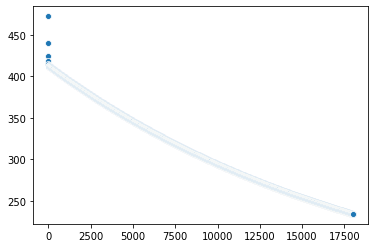

In [7]:
numEpochs= 18000
alpha = 0.0001
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise